# Logistic regression using 2 features

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\deepanshu\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  """
C:\Users\deepanshu\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  


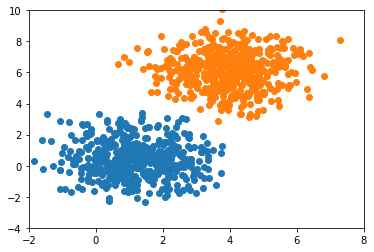

In [2]:
mean1=[1.2,0.5]
cov1=[[1,0.5],[0.5,-1.2]]
mean2=[4,6]
cov2=[[1,0.5],[0.5,-1.2]]
dist1=np.random.multivariate_normal(mean1,cov1,500)
dist2=np.random.multivariate_normal(mean2,cov2,500)
plt.xlim(-2,8)
plt.ylim(-4,10)
plt.scatter(dist1[:,0], dist1[:,1])
plt.scatter(dist2[:,0], dist2[:,1])
plt.show()


In [3]:
print(dist1.shape,dist2.shape)

(500, 2) (500, 2)


In [4]:
data=np.zeros([1000,3])
data[:500,:2]=dist1
data[500:,:2]=dist2
data[500:,-1]=1
print(data.shape)

(1000, 3)


In [5]:
np.random.shuffle(data)
data[:10]

array([[ 3.96148703,  5.70119187,  1.        ],
       [ 5.51079843,  7.55263506,  1.        ],
       [ 4.36446967,  5.92564763,  1.        ],
       [ 1.09912391, -0.93746004,  0.        ],
       [ 3.94213368,  3.60451963,  1.        ],
       [ 3.32755839,  7.25150744,  1.        ],
       [ 1.80586643,  0.02628975,  0.        ],
       [-0.4027273 , -1.53043782,  0.        ],
       [ 1.59205141,  2.47957919,  0.        ],
       [ 3.73543461,  5.05964769,  1.        ]])

In [6]:
X=data[:,:2]
y=data[:,-1]

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [9]:
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(750, 2) (250, 2)
(750,) (250,)


In [10]:
def sigmoid(z):
    return 1/(1+np.exp(-1*z))

In [11]:
def hypothesis(W,X,b):
    h=(X*W).sum() + b
    return sigmoid(h)

In [23]:
def log_likelihood(X,W,b,y_true):
    total=0.0
    m=X.shape[0]
    for i in range (m):
        if y_true[i]==0:
            total+=np.log(1-hypothesis(X[i],W,b))
        else:
            total+=np.log(hypothesis(X[i],W,b))
    total/=m
    return total

In [24]:
def gradient_ascent(X,W,b,y_true, learning_rate=0.1):
    gradb=0.0
    gradW=np.zeros(2)
    m=X.shape[0]
    for i in range(m):
        gradb+=(y_true[i] - hypothesis(X[i],W,b))*1
        gradW+=(y_true[i] - hypothesis(X[i],W,b))*X[i]
    
    gradb/=m
    gradW/=m
    
    W+=learning_rate*gradW
    b+=learning_rate*gradb
    logs=log_likelihood(X,W,b,y_true)
    return W,b,logs
    
    


In [25]:
W=np.array([0.5,0.5])
b=4.2
log_list=[]
for i in range(400):
    W,b,logs=gradient_ascent(X_train,W,b,y_train)
    log_list.append(logs)
print(W)
print(b)


[-0.02939015  0.99620686]
-2.471453194310445


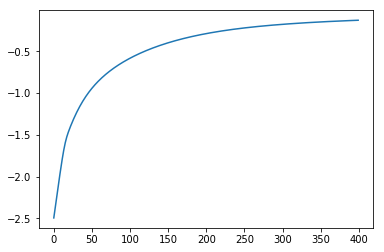

In [26]:
plt.plot(log_list)
plt.show()

In [27]:
def predict(x_sample,W,b):
    prob=hypothesis(x_sample,W,b)
    if prob>0.5:
        return 1
    else:
        return 0


In [28]:
def score(X_test,y_test,W,b):
    predicted=[]
    m=X_test.shape[0]
    for i in range(m):
        p=predict(X_test[i],W,b)
        predicted.append(p)
    predicted=np.asarray(predicted)
    return 100*(predicted==y_test).sum()/m

In [29]:
score(X_test,y_test,W,b)

98.8

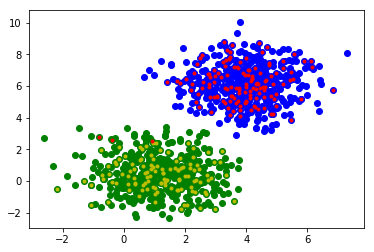

In [34]:
plt.scatter(dist1[:,0], dist1[:,1], color='g')
plt.scatter(dist2[:,0], dist2[:,1], color='b')
m=X_test.shape[0]
for i in range(m):
    x=X_test[i]
    p=predict(x,W,b)
    if p==0:
        plt.plot(x[0],x[1], 'y.') 
    else:
        plt.plot(x[0],x[1],'r.')
plt.show()


In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
lr=LogisticRegression()

In [41]:
lr.fit(X_train,y_train)

C:\Users\deepanshu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [42]:
lr.score(X_test,y_test)

1.0

# Logistic regression using 1 feature

In [82]:
data=np.zeros((1000,2))
data[:500,0]=np.random.uniform(low=0, high=6,size=(500,))
data[500:,0]=np.random.uniform(low=4, high=10, size=(500,))
data[500:-1]=1

np.random.shuffle(data)
print(data[:10])

[[1.         1.        ]
 [1.         1.        ]
 [1.         1.        ]
 [4.15372859 0.        ]
 [5.30058868 0.        ]
 [4.51928333 0.        ]
 [1.         1.        ]
 [1.         1.        ]
 [5.33616881 0.        ]
 [1.         1.        ]]


In [83]:
X=data[:,0]
y=data[:,-1]

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [86]:
X_train=X_train.reshape(750,1)
X_test=X_test.reshape(250,1)

print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(750, 1) (250, 1)
(750,) (250,)


In [87]:
def sigmoid(z):
    return 1/(1+np.exp(-1*z))

In [88]:
def hypothesis(W,X,b):
    h=(X*W).sum() + b
    return sigmoid(h)

In [89]:
def log_likelihood(X,W,b,y_true):
    total=0.0
    m=X.shape[0]
    for i in range (m):
        if y_true[i]==0:
            total+=np.log(1-hypothesis(X[i],W,b))
        else:
            total+=np.log(hypothesis(X[i],W,b))
    total/=m
    return total

In [90]:
def gradient_ascent(X,W,b,y_true, learning_rate=0.1):
    gradb=0.0
    gradW=0.0
    m=X.shape[0]
    for i in range(m):
        gradb+=(y_true[i] - hypothesis(X[i],W,b))*1
        gradW+=(y_true[i] - hypothesis(X[i],W,b))*X[i]
    
    gradb/=m
    gradW/=m
    
    W+=learning_rate*gradW
    b+=learning_rate*gradb
    logs=log_likelihood(X,W,b,y_true)
    return W,b,logs
    
    


In [91]:
W=np.array([0.5])
b=4.2
log_list=[]
for i in range(400):
    W,b,logs=gradient_ascent(X_train,W,b,y_train)
    log_list.append(logs)
print(W)
print(b)


[-2.10044207]
3.2359759952638023


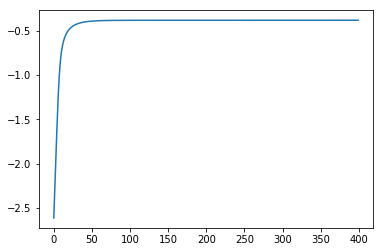

In [92]:
plt.plot(log_list)
plt.show()

In [93]:
def predict(x_sample,W,b):
    prob=hypothesis(x_sample,W,b)
    if prob>0.5:
        return 1
    else:
        return 0


In [94]:
def score(X_test,y_test,W,b):
    predicted=[]
    m=X_test.shape[0]
    for i in range(m):
        p=predict(X_test[i],W,b)
        predicted.append(p)
    predicted=np.asarray(predicted)
    return 100*(predicted==y_test).sum()/m

In [95]:
score(X_test,y_test,W,b)

86.4

In [96]:
from sklearn.linear_model import LogisticRegression

In [97]:
lrr=LogisticRegression()

In [98]:
lrr.fit(X_train,y_train)

C:\Users\deepanshu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [99]:
lrr.score(X_test,y_test)

0.864